# Regresja wielomianowa

In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Poniżej znajduje się wykres pewnego wielomianu na odcinku $[0,3]$, który będziemy chcieli przybliżyć, używając modelu regresji liniowej.

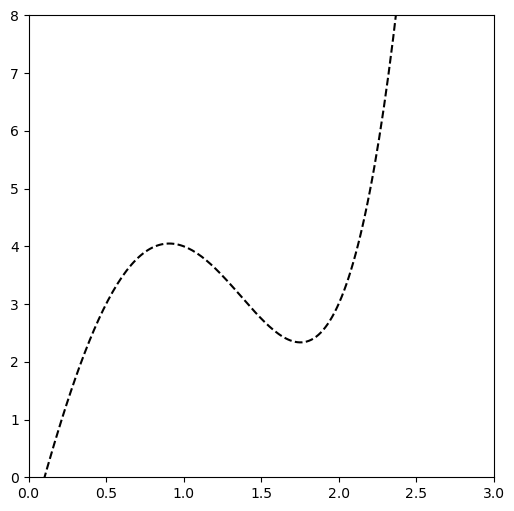

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Wylosujemy teraz kilka punktów z otoczenia funkcji $y=f(x)$. Pary $(x,y)$ będą tworzyć nasz zbiór treningowy.

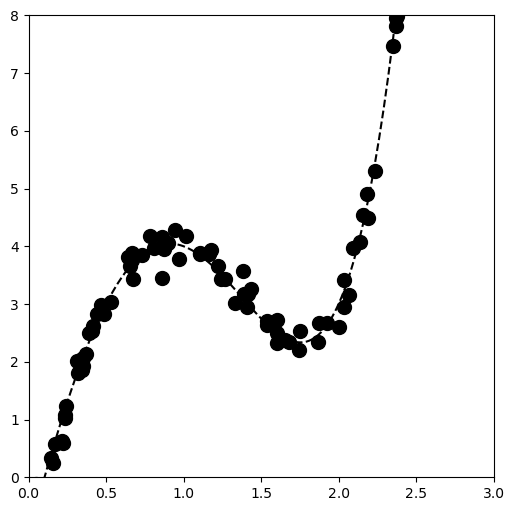

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej opisany równaniem:

$$
y=a\cdot x + b + \epsilon,
$$
gdzie $\epsilon$ to nieredukowalny błąd, o którym zakładamy, że pochodzi ze standardowego rozkładu normalnego. Wyestymujmy współczynniki oraz narysujmy prostą regresji.

In [4]:
M1 = np.vstack( (np.ones_like(x), x) ).T
p1 = np.linalg.lstsq(M1, y, rcond=None)

Definiujemy naszą funkcję regresji

In [5]:
f_lr_1 = lambda x: p1[0][1] * x +p1[0][0]

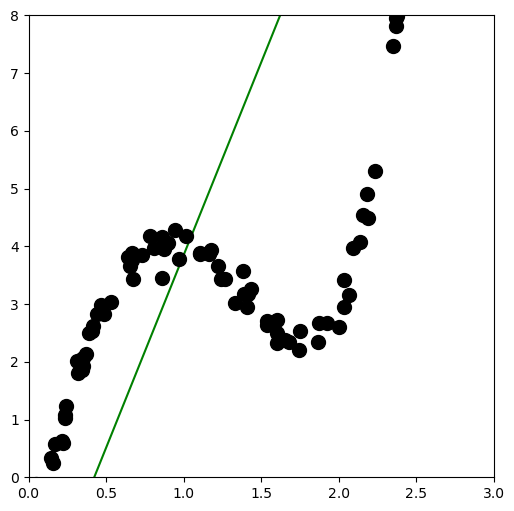

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr_1(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

## Zadanie 1 (1 punkt)
Proszę dopasować krzywą regresji opisaną wzorem

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

do naszych danych oraz narysować krzywą regresji.

## Zadanie 2 (1 punkt)
Proszę wykonać zadane nr 1, dopasowując taką krzywą regresji:

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

do naszych danych oraz narysować krzywą regresji.

## Zadanie 3 (2 punkty)
Porównaj ze sobą otrzymane krzywe aproksymujące oryginalną funkcję. Która z nich jest najlepsza? Użyj sensownej miary, by to zbadać, np. $R^2$, $R_{\text{adj}}^2$, F statystyka.

Wskazówka: zapoznaj się z pakietem _statsmodel.api_

## Zadanie 4 (3 punkty)
Wykonaj regresję za pomocą metody **statsmodels.formula.api.ols**, tak by wynik na zbiorze testowym był jak najlepszy dla zbioru Boston. Użyj sensownej metryki do zbadania jakości dopasowania krzywej regresyjnej.

In [23]:
# Ładujemy dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

In [ ]:
# Preprocessing
bos=pd.DataFrame(boston)
bos=pd.DataFrame(data)
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT']
bos.columns = feature_name
bos['PRICE']=target # To jest nasza zmienna zależna
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Zadanie 5 (3 punkty)
Wykonaj zadanie nr 4, ale dla danych reklamowych i wykorzystując jedynie dwa predyktory.

In [25]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
